# Introdução

Grupo: Germano Barcelos (3873), Guilherme Melos (3882), Jhonata Miranda (3859)

Neste relatório, serão introduzidos e explorados em prática os conceitos transformações geométricas, como rotação e translação, filtragem de banda e algumas manipulações básicas de imagem utilizando as bibliotecas _OpenCV_, _Numpy_, _MatPlotLib_ e _Scipy_ para realizar as atividades propostas.

Exercício 1 - Fazer um filtro de Prewitt para visualizar sua webcam

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

O objetivo desta atividade é aplicar o filtro de Prewitt, obtendo a entrada da webcam. Para aplicar o filtro, salvamos os frames da webcam e o convertemos em um array. Após isso, fazemos uma convolução do kernel de Prewitt com a imagem, tanto na vertical quanto na horizontal. Para realizar a convolução, utilizamos `np.convolve()`, passando a imagem original e a matriz como parâmetros. Por fim, a imagem final é constituida da raiz da soma das convoluções das matrizes vertical e horizontal do kernel, transformado novamente em um array e, ao final, exibimos o resultado.

In [ ]:
cap = cv2.VideoCapture(0)

# Making window size adjustable
cv2.namedWindow('image', cv2.WINDOW_NORMAL)

while (1):
    _, frame = cap.read()
    frame = cv2.flip(frame, 1)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    prewitt_cross_v = np.array([[-1, -1, -1],
                                [0, 0, 0],
                                [1, 1, 1]])

    prewitt_cross_h = np.array([[-1, 0, 1],
                                [-1, 0, 1],
                                [-1, 0, 1]])

    frame= np.asarray(frame, dtype="int32")
    frame=frame/255.

    vertical = ndimage.convolve(frame, prewitt_cross_v)
    horizontal = ndimage.convolve(frame, prewitt_cross_h)

    output_image = np.sqrt(np.square(horizontal) + np.square(vertical))
    output_image = np.asarray(np.clip(output_image, 0, 255))
    cv2.imshow("saida",output_image)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break


# Filtros

Exercício 2 - A partir da imagem do aviao.jpg, montar a imagem original, com ruido salt&pepper, com ruido gaussiano, e aplicar os filtros de media, mediana e gaussiano, com máscara de 3x3 e 7x7, com o histograma das respectivas imagens obtidas.

### Gaussian Noise

O ruído gaussiano tem uma probabilidade igual à distribuição normal, nomeada de distribuição Gaussiana. A magnitude desse ruído é controlado pelo desvio padrão ($\sigma$), sendo diretamente proporcional, ou seja, quanto maior o desvio padrão, maior o ruído aplicado.

### Impulsive Noise

Esse tipo de ruído substitui alguns pixels da imagem para um valor mínimo ou um valor máximo. Existem alguns tipos de ruídos de impulsos como o salt noise, o pepper noise e o salt an pepper noise. O primeiro adiciona, randomicamente um brilho à imagem, ou seja, substitui um pixel pelo valor de 255 por todo a imagem. O Pepper noise é o contrário do salt, substitui pixels pelo valor de 0 por toda a imagem. Já o Salt and Pepper é a junção dos dois, a partir de um modelo estatístico.

In [29]:
def gaussian_noise(size, mean=0, std=0.01):
    noise = np.multiply(np.random.normal(mean, std, size), 255)
    return noise

def impulsive_noise(image, prob=0.1, mode='salt_and_pepper'):
    noise = np.array(image, copy=True)
    for x in np.arange(image.shape[0]):
        for y in np.arange(image.shape[1]):
            rnd = np.random.random()
            if rnd < prob:
                rnd = np.random.random()
                if rnd > 0.5:
                    noise[x,y] = 255
                else:
                    noise[x,y] = 0
    
    return noise

def gera_histograma(image,title):
    hist_img,_ = np.histogram(image, bins=256, range=(0,255))
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.title(title)
    plt.imshow(image, cmap="gray", vmin=0, vmax=255)
    plt.axis('off')
    plt.subplot(122)
    plt.bar(np.arange(256), hist_img) 

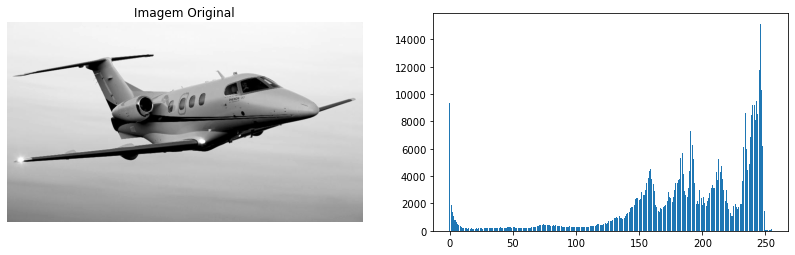

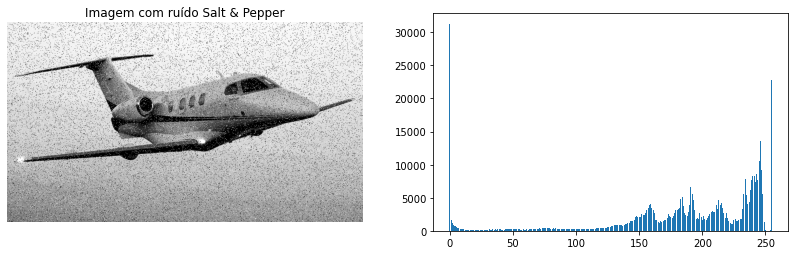

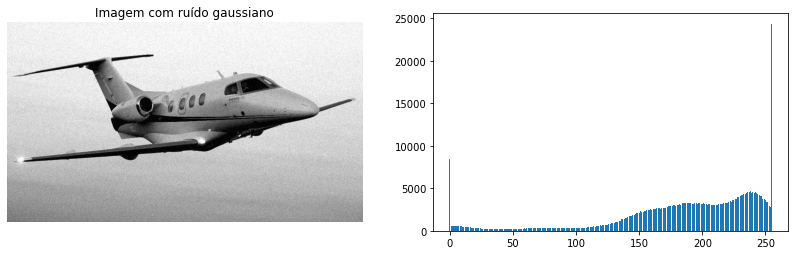

In [30]:
#imagem original e seu histograma
img = cv2.imread("aviao.jpg",0)
np.unique(img)
gera_histograma(img,"Imagem Original")

#imagem com ruído salt&pepper
img_imp = impulsive_noise(img, prob=0.1)
gera_histograma(img_imp,"Imagem com ruído Salt & Pepper")

#imagem com ruído gaussiano
# creating the noise matrix to be added
gau_noise = gaussian_noise(img.shape, mean=0, std=0.05)
# adding and clipping values below 0 or above 255
img_gau = np.clip(img.astype(int)+gau_noise, 0, 255)
gera_histograma(img_gau,"Imagem com ruído gaussiano")

# Aplicando filtros na imagem com ruído Salt & Pepper

Esse exercício é interessante pois mostra a ideia estatística de utilizar a média e a mediana para o Salt & Pepper. Tendo dito, que esse tipo de ruído substitui pixels com 0 e 255, a imagem possui outliers. Sendo assim, a média é, significativamente, alterada por mínimos e máximos, enquanto a mediana é mais robusta quando deve-se lidar com outliers. Esse resultado pode ser verificado abaixo. Quando aplicamos o filtro com a média, ainda há ruído; após aplicarmos o filtro com a mediana, percebe-se um alto nível de definição da imagem. 

Quando aplicamos o filtro gaussiano, estamos contendo valores muito pequenos e valores muito grandes, como é perceptível no histograma, que não possui mais picos em 0 e 255. Porém como o ruído slat e pepper substitui valores por toda imagem, não é possível alterar os pixels que são pertencentes ao intervalo da distribuição gaussiana. Ou seja, o filtro gaussiano não é o melhor para o lidar com o ruído salt and pepper.

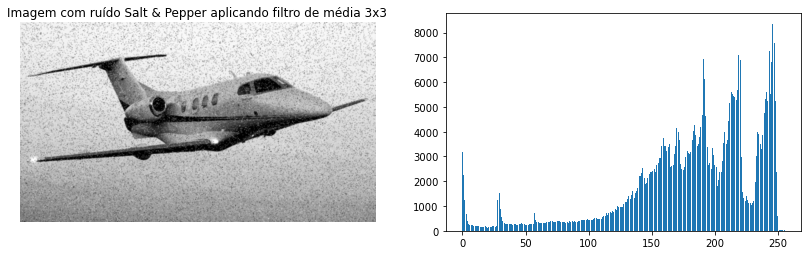

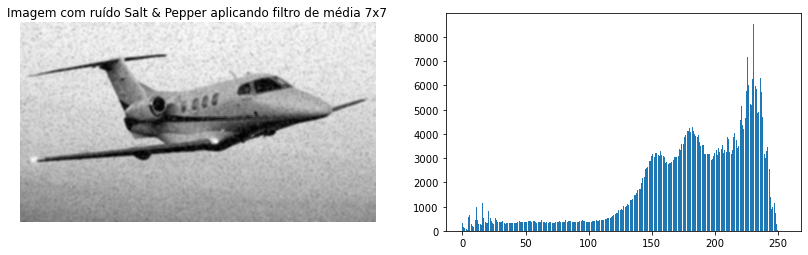

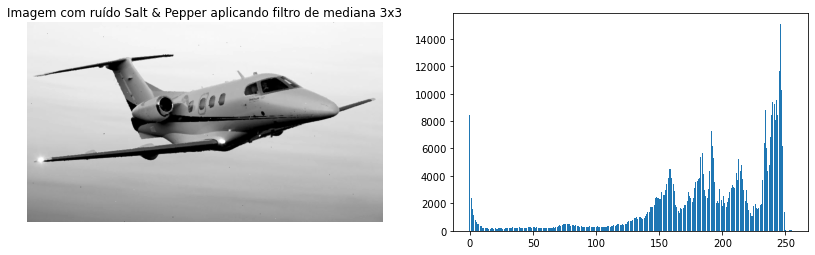

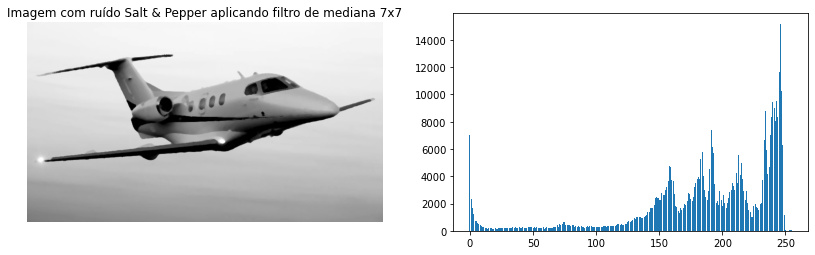

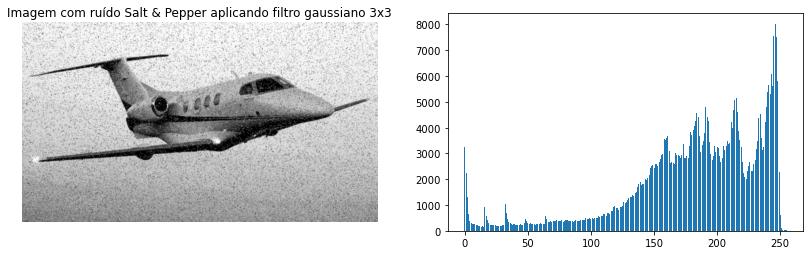

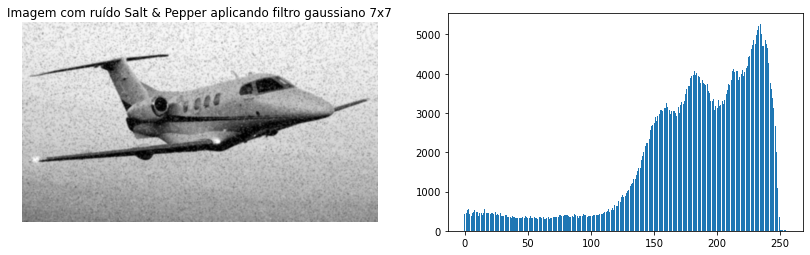

In [173]:
# Filtro de media(blur) 3x3 na imagem com ruído Salt & Pepper
filter_blur=cv2.blur(img_imp,ksize=(3,3))
gera_histograma(filter_blur,"Imagem com ruído Salt & Pepper aplicando filtro de média 3x3")

# Filtro de media(blur) 7x7 na imagem com ruído Salt & Pepper
filter_blur=cv2.blur(img_imp,ksize=(7,7))
gera_histograma(filter_blur,"Imagem com ruído Salt & Pepper aplicando filtro de média 7x7")

#Filtro MedianBlur(mediana) 3x3 na imagem com ruído Salt & Pepper 
median=cv2.medianBlur(np.uint8(img_imp),3)
gera_histograma(median,"Imagem com ruído Salt & Pepper aplicando filtro de mediana 3x3")

#Filtro MedianBlur(mediana) 7x7 na imagem com ruído Salt & Pepper 
median=cv2.medianBlur(np.uint8(img_imp),7)
gera_histograma(median,"Imagem com ruído Salt & Pepper aplicando filtro de mediana 7x7")

#Filtro Gaussiano 3x3 na imagem com ruído Salt & Pepper 
gaugaussian=cv2.GaussianBlur(src=img_imp,ksize=(3,3),sigmaX=0)
gera_histograma(gaugaussian,"Imagem com ruído Salt & Pepper aplicando filtro gaussiano 3x3")

#Filtro Gaussiano 7x7 na imagem com ruído Salt & Pepper 
gaugaussian=cv2.GaussianBlur(src=img_imp,ksize=(7,7),sigmaX=0)
gera_histograma(gaugaussian,"Imagem com ruído Salt & Pepper aplicando filtro gaussiano 7x7")

## Aplicando filtros na imagem com ruído Gaussiano

A aplicação de filtros para o ruído gaussiano é performático pelo fato de o ruído alterar os pixels conforme uma distribuição uniforme. Logo, todos os filtros geraram resultados eficientes.

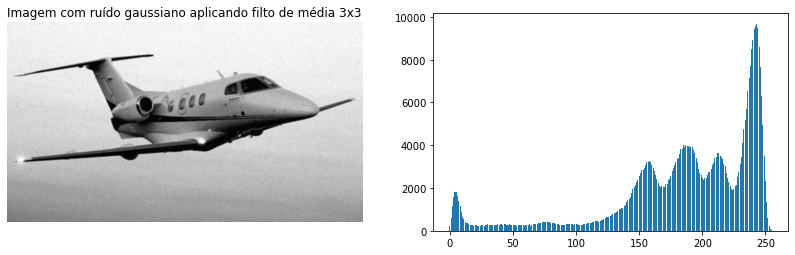

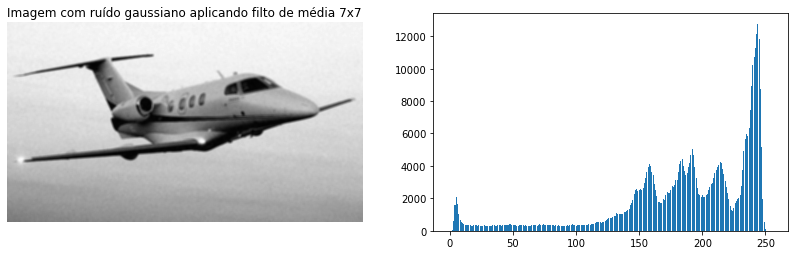

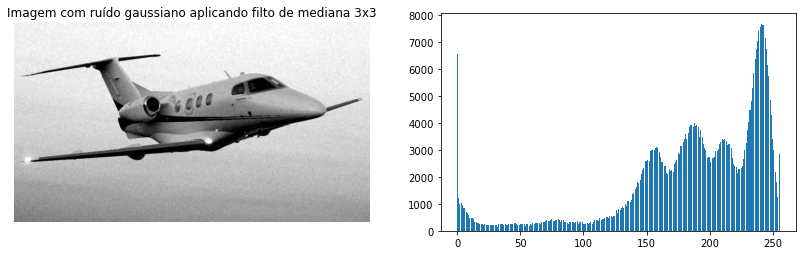

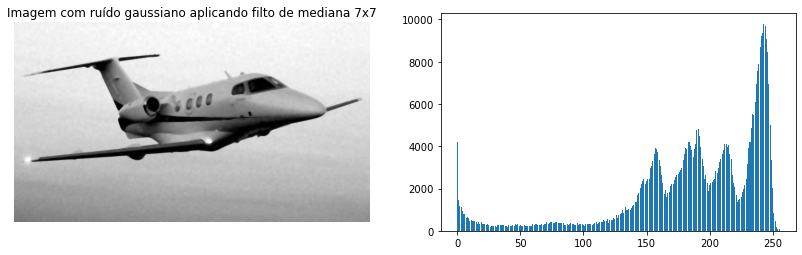

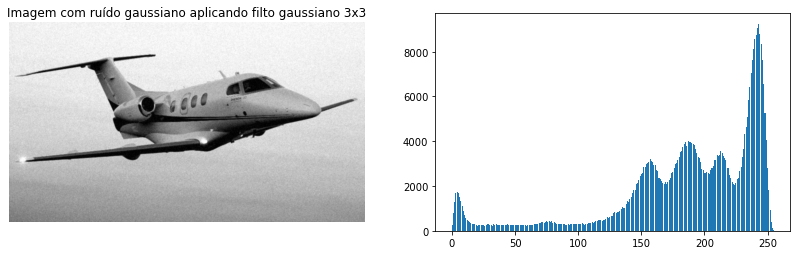

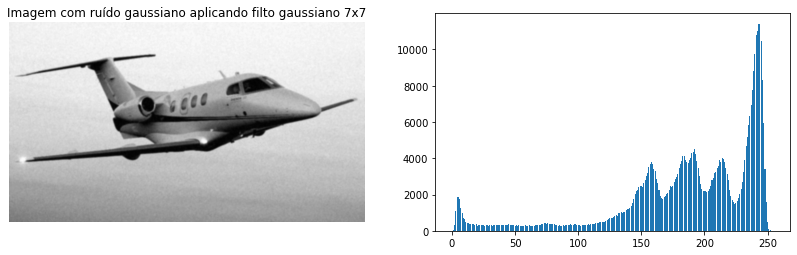

In [32]:
# Filtro de media(blur) 3x3 na imagem com ruído gaussiano
filter_blur=cv2.blur(img_gau,ksize=(3,3))
gera_histograma(filter_blur,"Imagem com ruído gaussiano aplicando filto de média 3x3")

# Filtro de media(blur) 7x7 na imagem com ruído gaussiano
filter_blur=cv2.blur(img_gau,ksize=(7,7))
gera_histograma(filter_blur,"Imagem com ruído gaussiano aplicando filto de média 7x7")

#Filtro MedianBlur(mediana) 3x3 na imagem com ruído gaussiano 
median=cv2.medianBlur(np.uint8(img_gau),3)
gera_histograma(median,"Imagem com ruído gaussiano aplicando filto de mediana 3x3")


#Filtro MedianBlur(mediana) 7x7 na imagem com ruído gaussiano 
median=cv2.medianBlur(np.uint8(img_gau),7)
gera_histograma(median,"Imagem com ruído gaussiano aplicando filto de mediana 7x7")


#Filtro Gaussiano 3x3 na imagem com ruído gaussiano 
gaugaussian=cv2.GaussianBlur(src=img_gau,ksize=(3,3),sigmaX=0)
gera_histograma(gaugaussian,"Imagem com ruído gaussiano aplicando filto gaussiano 3x3")

#Filtro Gaussiano 7x7 na imagem com ruído gaussiano 
gaugaussian=cv2.GaussianBlur(src=img_gau,ksize=(7,7),sigmaX=0)
gera_histograma(gaugaussian,"Imagem com ruído gaussiano aplicando filto gaussiano 7x7")

# Filtros de Gradiente ou de Derivadas de Imagens

Exercício 3 - Aplicar o  filtros Sobel, Roberts, Preewit e Canny na imagem do avião ;
depois , na imagem original, aplicar um filtro de media 5x5, e repetir a operação

O objetivo desta atividade é aplicar os filtros de Sobel, Roberts, Prewitt e Canny na imagem do avião, que foi convertida num array. Após isso, fazemos uma convolução do kernel para cada um dos métodos supramencionados com a imagem, tanto na vertical quanto na horizontal. Para realizar a convolução, utilizamos `np.convolve()`, passando a imagem original e a matriz como parâmetros, tanto na horizontal como na vertical. Por fim, a imagem final é constituida da raiz da soma das convoluções das matrizes vertical e horizontal do kernel, transformado novamente em um array e exibimos o resultado.

In [199]:
def sobel_filter(img):
    sobelxy = cv2.Sobel(src=img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=3)
    filtered_image_xy = cv2.convertScaleAbs(sobelxy)
    
    return output_image

def roberts_filter(img):
    roberts_cross_v = np.array([[1, 0 ],
                           [0,-1 ]] )
  
    roberts_cross_h = np.array([[ 0, 1 ],
                                 [ -1, 0 ]])
    img = np.float64(img)
    img /= 255.
    
    from scipy import ndimage
    
    vertical = ndimage.convolve( img, roberts_cross_v )
    horizontal = ndimage.convolve( img, roberts_cross_h )

    edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
    edged_img*=255
    return output_image

def prewitt_filter(img):
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(img, -1, kernelx)
    img_prewitty = cv2.filter2D(img, -1, kernely)
    img_prewitt=img_prewittx + img_prewitty
    return output_image

def plot_image(img, title, figsize, cmap="viridis"):
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.axis('off')
    plt.imshow(img, cmap=cmap)
    
def plot_images(imgs, titles, x, y, figsize, cmap="viridis"):
    images_list_w_titles = list(zip(imgs, titles))
    
    f, axarr = plt.subplots(x,y, figsize=figsize)
    for i in range(x):
        for j in range(y):
            if x > 1:
                axarr[i, j].imshow(np.uint8(images_list_w_titles[(i*y)+j][0]), cmap=cmap)
                axarr[i, j].set_title(images_list_w_titles[(i*y)+j][1])
            else:
                axarr[j].imshow(np.uint8(images_list_w_titles[(i*y)+j][0]), cmap=cmap)
                axarr[j].set_title(images_list_w_titles[(i*y)+j][1])

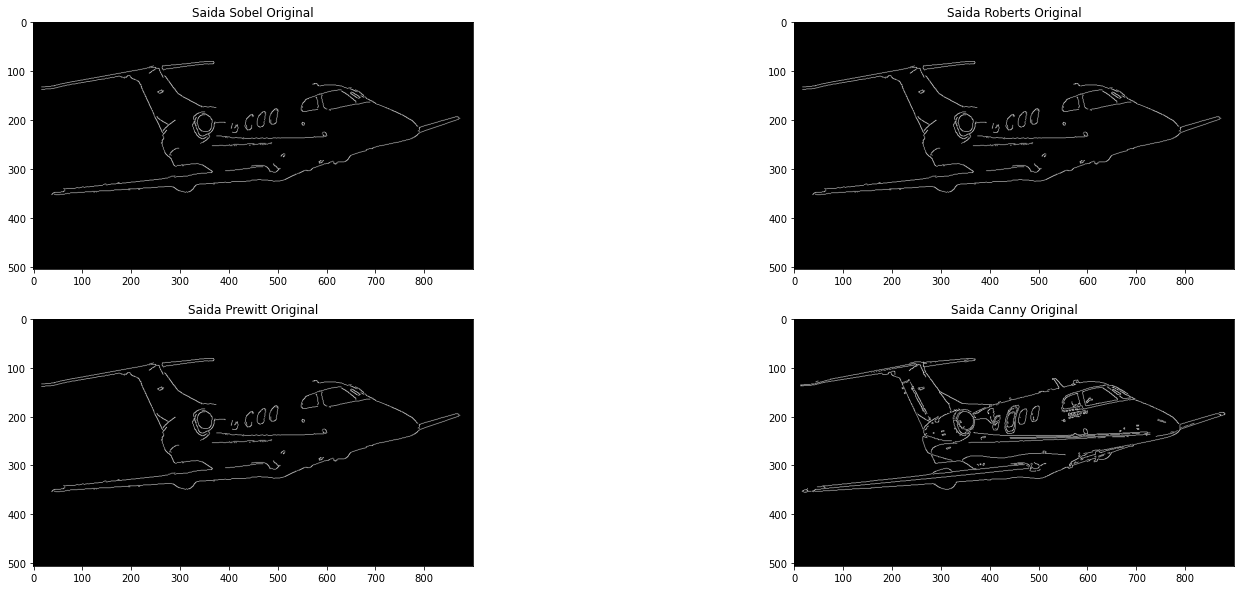

In [202]:
img = cv2.imread("aviao.jpg",0)
result_sobel_original = sobel_filter(img)
result_roberts_original = roberts_filter(img)
result_prewitt_original = prewitt_filter(img)

edges = cv2.Canny(img,100,200)
result_canny_original = edges

images = [result_sobel_original, result_roberts_original, result_prewitt_original, result_canny_original]
titles = ["Saida Sobel Original", "Saida Roberts Original", "Saida Prewitt Original", "Saida Canny Original"]


plot_images(images, titles, 2, 2, figsize=(25, 10), cmap="gray")

## Aplicando filtro de média 5x5 e refazendo os filtros

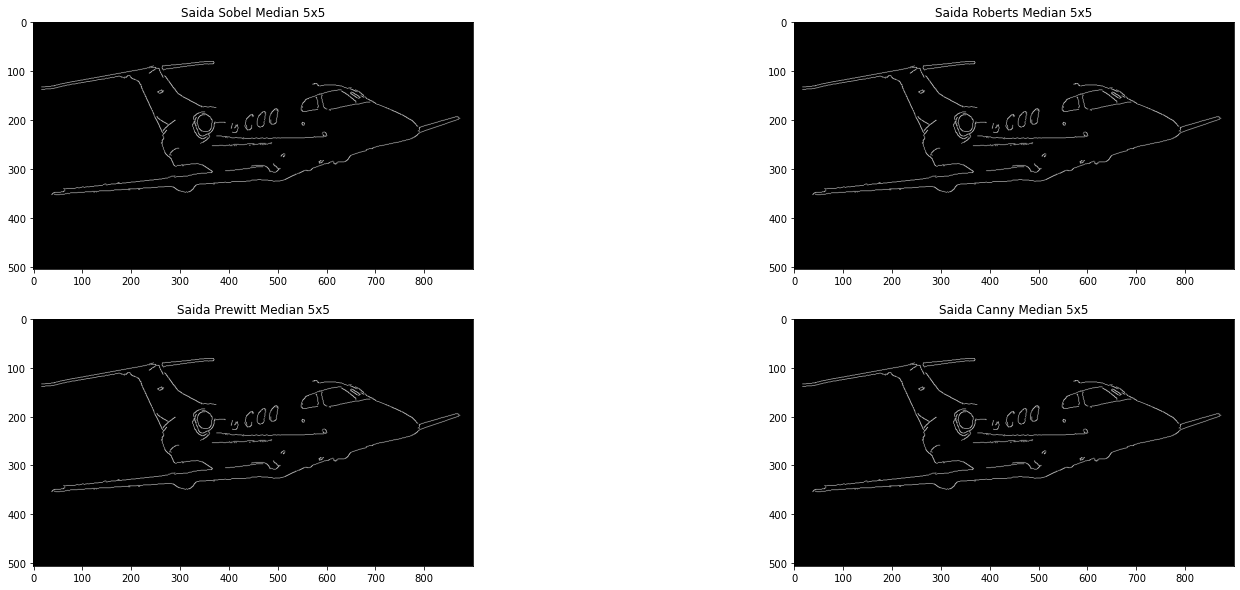

In [201]:
img = cv2.imread("aviao.jpg",0)

img_median = cv2.blur(img,(5,5))

result_sobel_median = sobel_filter(img_median)
result_canny_median = cv2.Canny(img_median,100,200)
result_roberts_median = roberts_filter(img_median)
result_prewitt_median = prewitt_filter(img_median)

images = [result_sobel_median, result_roberts_median, result_prewitt_median, result_canny_median]
titles = ["Saida Sobel Median 5x5", "Saida Roberts Median 5x5", "Saida Prewitt Median 5x5", "Saida Canny Median 5x5"]


plot_images(images, titles, 2, 2, figsize=(25, 10), cmap="gray")

# Bitwise AND com filtros

Exercício 4 - A partir das imagens obtidas acima, faca uma operação AND com a imagem original e observe
 o resultado.

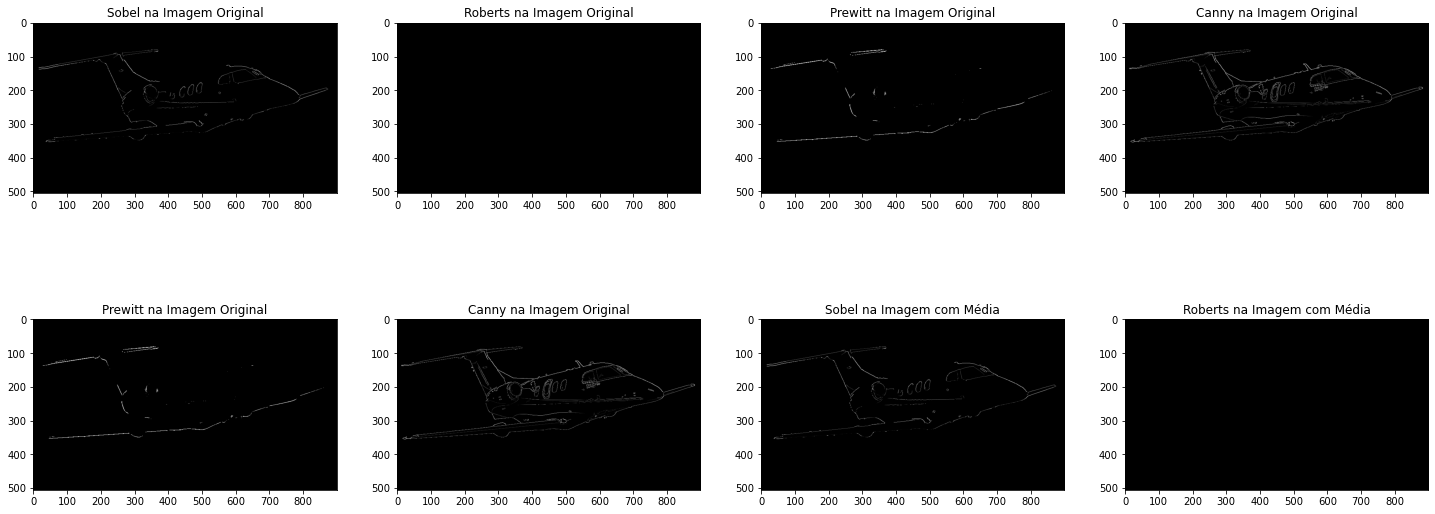

In [189]:
img = cv2.imread("aviao.jpg")
img = np.float64(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
img_float = np.float64(img)
img_uint = np.uint8(img)

and_sobel_original = cv2.bitwise_and(img_uint, result_sobel_original)
and_roberts_original = cv2.bitwise_and(img_float, result_roberts_original)
and_prewitt_original = cv2.bitwise_and(img_float, result_prewitt_original)
and_canny_original = cv2.bitwise_and(img_uint, result_canny_original)
and_sobel_median = cv2.bitwise_and(img_uint, result_sobel_median)
and_roberts_median = cv2.bitwise_and(img_float, result_roberts_median)
and_prewitt_median = cv2.bitwise_and(img_float, result_prewitt_median)
and_canny_median = cv2.bitwise_and(img_uint, result_canny_median)

bitwises = [and_sobel_original, and_roberts_original, and_prewitt_original, and_canny_original, and_sobel_median, and_roberts_median, and_prewitt_median, and_canny_median]
titles = ['Sobel na Imagem Original', 'Roberts na Imagem Original', 'Prewitt na Imagem Original', 'Canny na Imagem Original', 'Sobel na Imagem com Média', 'Roberts na Imagem com Média', 'Prewitt na Imagem com Média', 'Canny na Imagem com Média']
# images = list(zip(bitwises, titles))

plot_images(bitwises, titles, 2, 4, figsize=(25, 10), cmap="gray")

# Segmentação por cores e Filtros

Exercício 5 - Usando segmentação por cores e filtros passa baixa e depois passa alta, tente traçar as linhas de plantio da imagem 

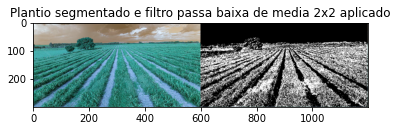

In [175]:
def mostraImagem(titulo, img, cmap="viridis"):
    plt.title(titulo)
    plt.imshow(img, cmap=cmap)

imagem = cv2.imread("plantioCana.jpg")
imagem = cv2.resize(imagem,(600,300),interpolation = cv2.INTER_AREA)
[col,lin,dim] = imagem.shape
resultado = imagem.copy()

#aplicando segmentação por cores usando os limites r=[80,190], g=[100,170] e b=[30,80] obtidos via coleta de cores do paint
for j in range(0,col-1):
    for i in range(0,lin-1):
        (b,g,r) = imagem[j,i]
        if (b>30 and b<80) and (g>100 and g<170) and (r>80 and r<190):
            b = 255
            g = 255
            r = 255
            resultado[j,i,]= np.array([b,g,r])
        else:
            resultado[j,i,]= np.array([0,0,0])
concat = cv2.hconcat([imagem,resultado])
mostraImagem("Plantio segmentado", concat)

#aplicando filtro de media

filter_blur=cv2.blur(resultado,ksize=(2,2))
concat = cv2.hconcat([imagem,filter_blur])
mostraImagem("Plantio segmentado e filtro passa baixa de media 2x2 aplicado", concat, cmap="gray")

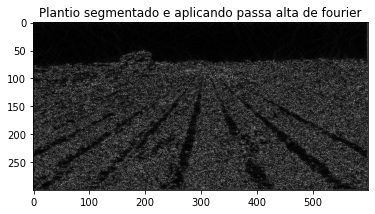

In [176]:
resultado = cv2.cvtColor(filter_blur,cv2.COLOR_BGR2GRAY)
dft = cv2.dft(np.float32(resultado), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
rows, cols = resultado.shape
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.ones((rows, cols, 2), np.uint8)
r = 80
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
mostraImagem("Plantio segmentado e aplicando passa alta de fourier",img_back, cmap="gray")